### First we import our libraries , The ones which we will require to analyse the data find any missing values or null values

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### We read the csv file of Real estate, then we find the null values, then we find the null values which are not present in this data set. 

In [320]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# **Exploratory Data Analysis (EDA)**

In [321]:
df.size

3312

In [322]:
df.isnull().sum

<bound method DataFrame.sum of         No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0    False                False  ...         False                       False
1    False                False  ...         False                       False
2    False                False  ...         False                       False
3    False                False  ...         False                       False
4    False                False  ...         False                       False
..     ...                  ...  ...           ...                         ...
409  False                False  ...         False                       False
410  False                False  ...         False                       False
411  False                False  ...         False                       False
412  False                False  ...         False                       False
413  False                False  ...         False                       False

[414 rows x 8 column

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Therefore, there are no null values in this data set

In [324]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [325]:
df.shape

(414, 8)

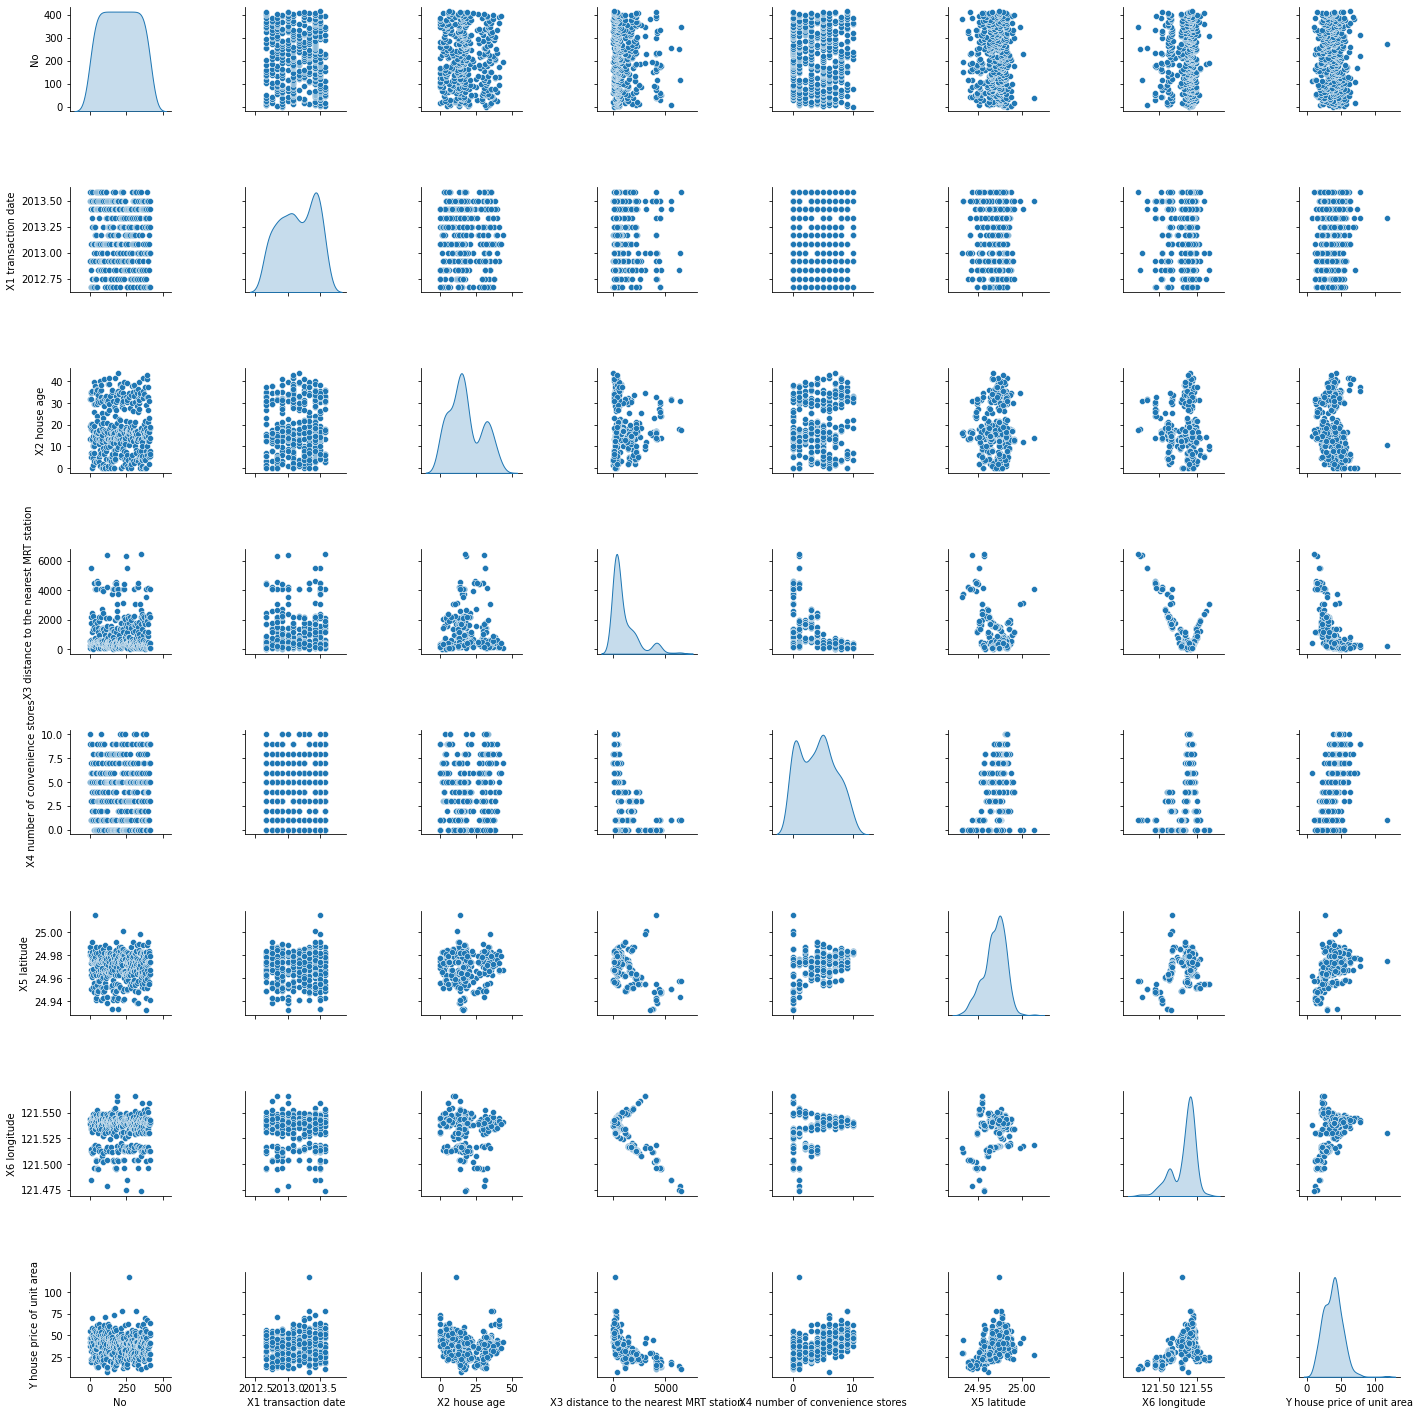

In [326]:
sns.pairplot(df, diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


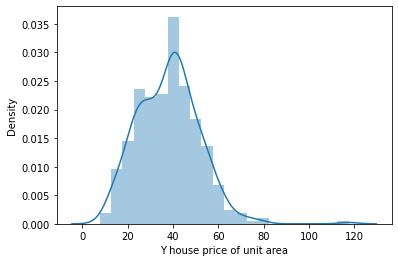

In [327]:
sns.distplot(df['Y house price of unit area'])
plt.show()

In [328]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# **Performing Linear Regression Steps :**

## Separating the target column from the dataset

In [329]:
X = df.drop(['Y house price of unit area'],axis=1)
y = df['Y house price of unit area']

In [330]:
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [331]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

## Separating into Train and Test variables using SkLearn

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,train_size=0.9,test_size=0.1)

In [333]:
X.shape

(414, 7)

In [334]:
X_train.shape

(372, 7)

In [335]:
X_test.shape

(42, 7)

In [336]:
y.shape

(414,)

In [337]:
y_train.shape

(372,)

In [338]:
y_test.shape

(42,)

## The splitting is done as 90% Training Set and 10% Testing Set

In [339]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model_predict =  model.predict(X_test)
model_predict

array([43.99997079, 36.0101504 , 53.66646921, 40.62240471, 48.04226516,
       28.06394841, 43.18672152, 47.26500885, 50.44745149, 30.91270365,
       37.48939158, 47.46695138, 39.45506547, 32.61604062, 48.27732426,
       39.55917913, 54.10685485, 43.8650296 , 33.75937031, 27.49112177,
       12.38403914, 42.24645576, 31.27450084, 44.05135797, 27.15765852,
       33.50175968, 20.32871313, 36.873417  , 39.97446127, 40.31182365,
       54.50398765, 36.44912521, 40.28737889, 45.92155013, 27.35324929,
       47.21692771, 37.31957146, 15.1926957 , 42.27046379, 47.22819563,
       47.49605679, 45.64886435])

In [340]:
y_test

121    48.0
353    31.3
96     59.5
43     34.1
125    48.6
204    26.6
235    39.3
358    45.1
379    69.7
169    23.5
173    35.1
98     51.0
399    37.3
216    39.7
23     47.9
257    43.9
381    47.3
56     41.9
398    23.0
229    19.0
331    15.6
188    44.3
282    25.6
103    45.7
369    22.8
78     29.8
307    24.7
134    42.2
265    38.1
400    35.5
236    61.9
267    41.1
149    39.7
54     51.7
396    31.9
18     42.3
205    21.4
298    16.7
293    42.5
160    57.8
7      46.7
268    40.1
Name: Y house price of unit area, dtype: float64

In [341]:
from sklearn.metrics import r2_score
r2_score(y_test,model_predict)

0.7498733375986386

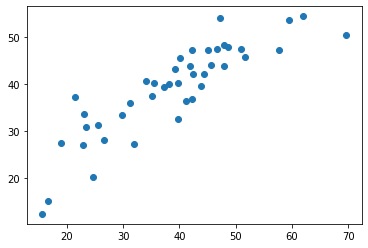

In [342]:
plt.scatter(y_test,model_predict)

In [343]:
df1 = pd.DataFrame({'Actual Data':y_test, 'Predicted Data':model_predict})
df1

,Actual Data,Predicted Data
121,48.0,43.999971
353,31.3,36.010150
96,59.5,53.666469
43,34.1,40.622405
125,48.6,48.042265
204,26.6,28.063948
235,39.3,43.186722
358,45.1,47.265009
379,69.7,50.447451
169,23.5,30.912704


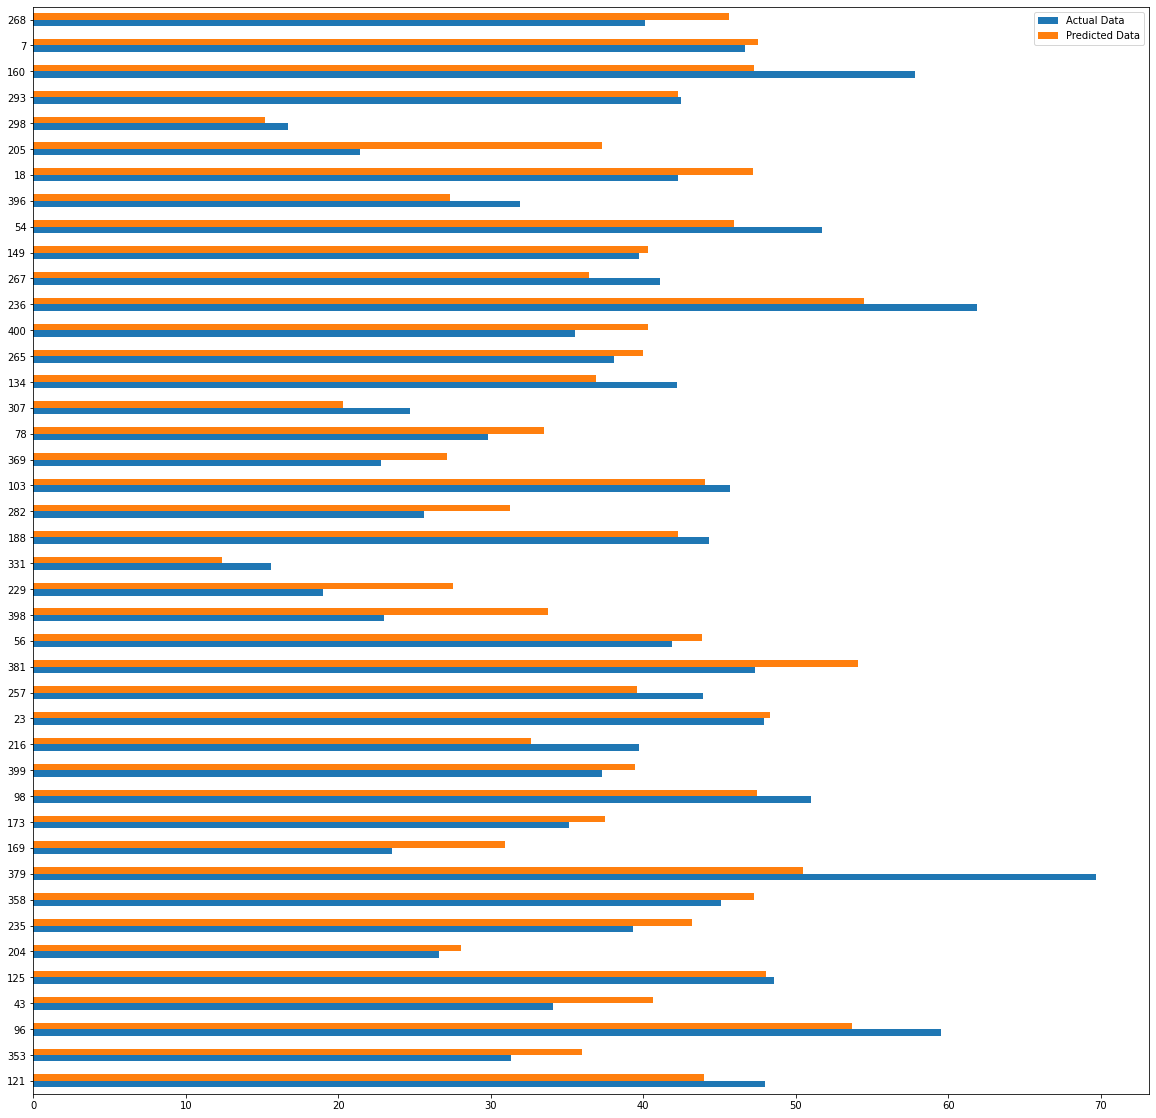

In [355]:
df1.plot(figsize=(20,20),kind='barh' )

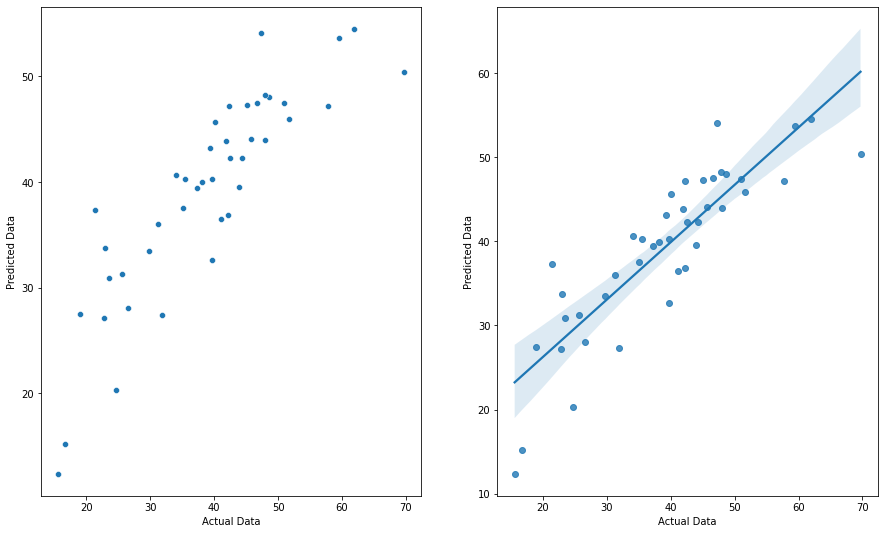

In [346]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.scatterplot(x='Actual Data', y = 'Predicted Data', data = df1)
plt.subplot(1,2,2)
sns.regplot(x='Actual Data', y = 'Predicted Data', data = df1)